Loading data from shared_data/dataset_2_test.jsonl...
Loaded 200 items.
['And I propose we make a major investment in conservation by fully funding the Land and Water Conservation Fund.']
Making predictions...


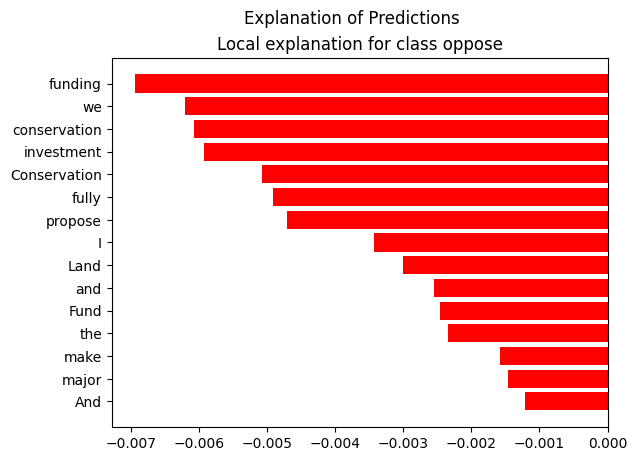

In [21]:
import matplotlib.pyplot as plt
import torch
from setfit import SetFitModel
from transformers import AutoTokenizer
from lime.lime_text import LimeTextExplainer

from lib.utils import load_jsonl_file


def get_device():
  """Returns the appropriate device available in the system: CUDA, MPS, or CPU"""
  if torch.backends.mps.is_available():
    return torch.device("mps")
  elif torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")


# Get best device
device = get_device()

CLASS_NAMES = ['support', 'oppose']  # 0/1

model_id = "sentence-transformers/paraphrase-mpnet-base-v2"  # Example model_id

# Load dataset
DATASET = load_jsonl_file("shared_data/dataset_2_test.jsonl")

support_class = [data for data in DATASET if data["label"] == "support"]
oppose_class = [data for data in DATASET if data["label"] == "oppose"]

# Load model
model_setfit_path = "models/22"
model = SetFitModel.from_pretrained(model_setfit_path, local_files_only=True, device=device)

# Load the corresponding tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

texts = [data["text"] for data in support_class]

sentence = texts[15:16]
print(sentence)
text = sentence[0]


def predict_proba(_text):
  # Make predictions using the model
  print("Making predictions...")
  predictions = model.predict_proba(_text)
  return predictions.cpu()


# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=CLASS_NAMES)

# Generate explanation
exp = explainer.explain_instance(
  text_instance=text, 
  classifier_fn=predict_proba, 
  num_features=15
)

# Visualize the explanation
fig = exp.as_pyplot_figure(label=exp.available_labels()[0])
fig.suptitle('Explanation of Predictions')  # Add a title to the figure
plt.show()
